In [21]:
from hw import hw_helper 
import numpy as np
from numpy import array
from fox_toolbox.utils import rates

import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import seaborn as sns
sns.set_context("poster")
sns.set(rc={'figure.figsize': (12, 6.)})
sns.set_style("whitegrid")

Supposing T-measure drift is:

<font size = 5>
$\frac{1}{a} \int_{t_1}^{t_2}\left[e^{-a(T-s)}-e^{-a(U+T-2 s)}\right]  d s$

## Validation of integral_v:

In [3]:
a = 0.05
hw_helper.integral_mT(t1=0, t2=2, T=2, U=2, a=a)

1.8111834012125527

<img src="images/mT.png">

## Validation of get_drift_T:

In [5]:
sigma = rates.Curve(array([ 0.        ,  0.99726027, 30.99726027]), array([0.11615363, 0.11615363, 0.11615363]), 'PieceWise', '')

In [6]:
1.8111834012125527 * 0.11615363 * 0.11615363 -\
hw_helper.get_drift_T(0, 2, a, sigma)

-3.469446951953614e-18

## It also validates hw_helper.hw_integration function used in get_drift_T

In [15]:
T = 6.

spotstep = 1000
timestep = 100

mr = 0.05
sigma = rates.Curve(array([ 0., 10.]), array([0.005, 0.005]), 'PieceWise', '')

tt = array( [round(x,2) for x in np.linspace(0, T, timestep+1, endpoint = True)] )

In [18]:
def drift_const(s, t, U, mr):
    p1 = 1.0 - np.exp(-mr * (t - s))
    p2 = np.exp(-mr * (U - t)) - np.exp(-mr * (U + t- 2 * s))
    return (1/mr) ** 2 * (p1 - p2 / 2.0)

In [27]:
mst = array([ -hw_helper.get_drift_T(0, t, U=T, a=mr, sigma=sigma) for t in tt])
brigo_const = -drift_const(0.0, tt, T, mr) * sigma(0)**2

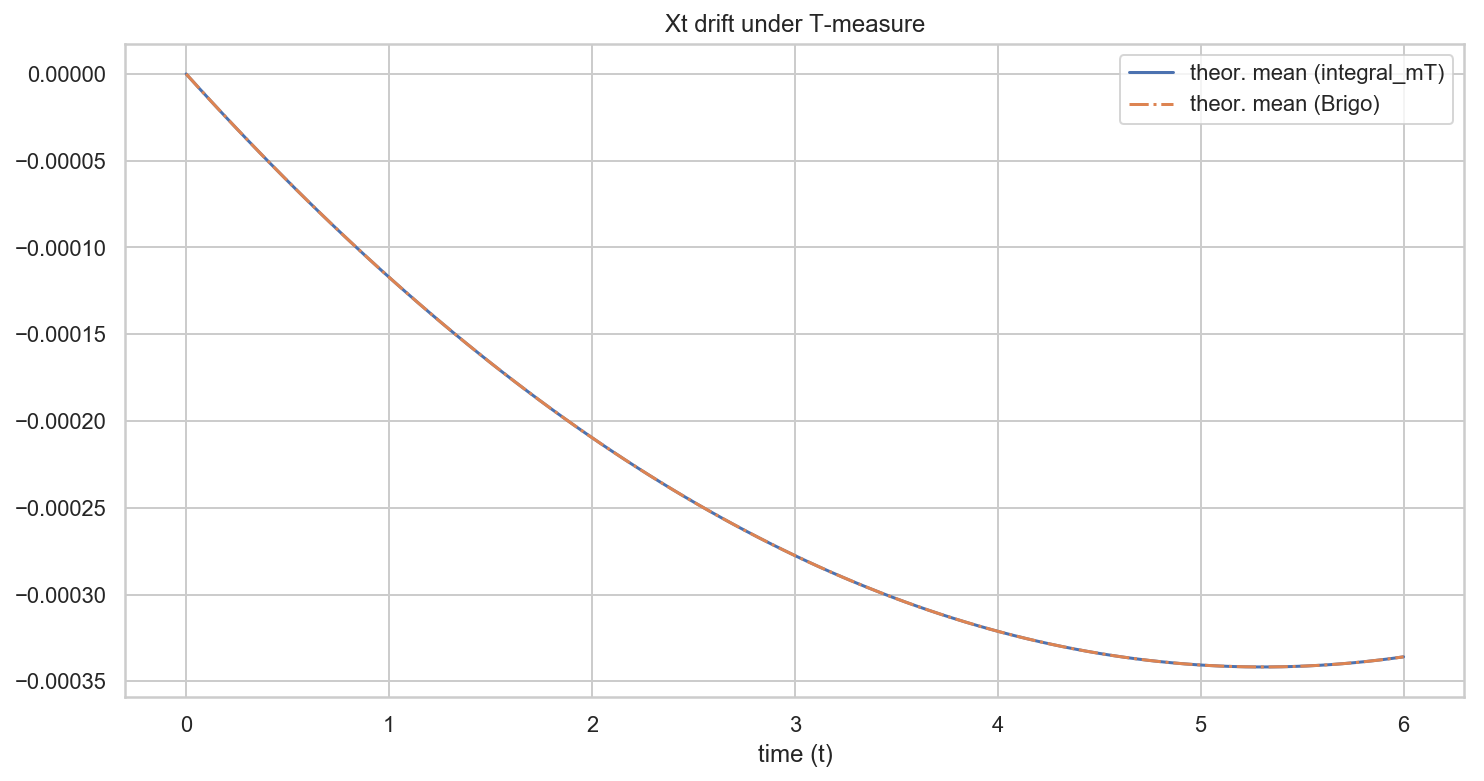

In [28]:
plt.plot(tt, mst, label = 'theor. mean (integral_mT)');
plt.plot(tt, brigo_const, label = 'theor. mean (Brigo)', ls='-.');
plt.title('Xt drift under T-measure'); plt.xlabel('time (t)'); plt.legend()

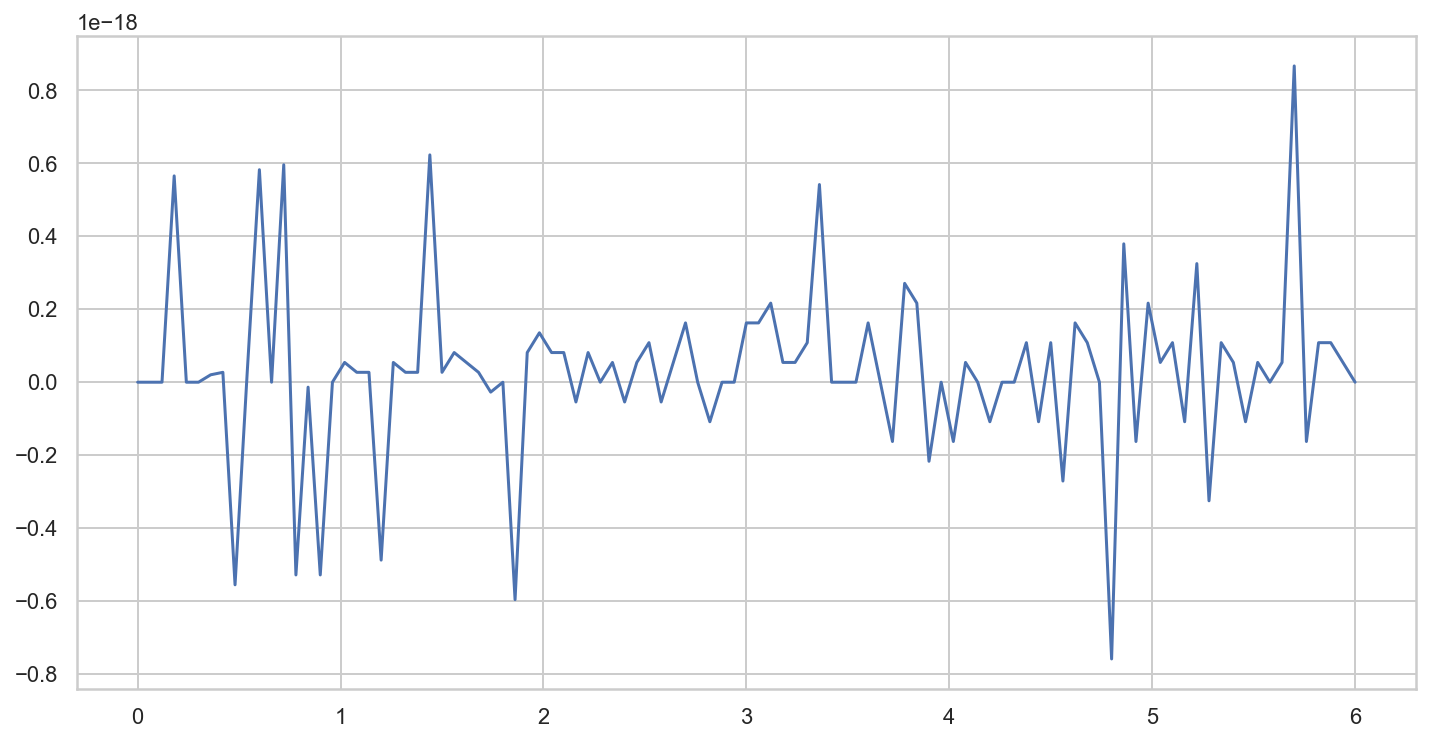

In [29]:
plt.plot(tt, mst - brigo_const)